In [1]:
# Formação Cientista de Dados - Fernando Amaral e Jones Granatyr
# Deep Learning
# Importação das bibliotecas
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.utils import np_utils
import numpy as np
from sklearn.metrics import confusion_matrix
from keras.datasets import mnist
#pip install tensorflow (executar no Anaconda Prompt)

Text(0.5, 1.0, '0')

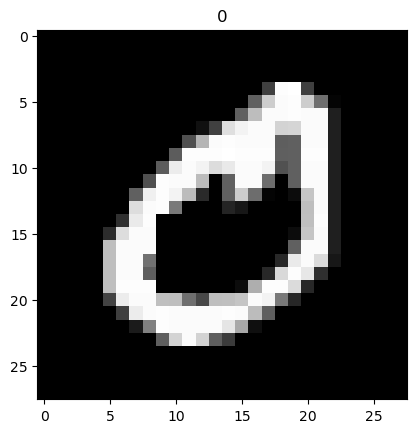

In [4]:
# Obtenção dos dados e divisão automática entre treinamento e teste
(X_treinamento, y_treinamento), (X_teste, y_teste) = mnist.load_data()
# Visualização de imagens específicas
plt.imshow(X_treinamento[21], cmap = 'gray')
plt.title(y_treinamento[21])

In [5]:
# Mudança de dimensão, originalmente está em 28x28 e precisamos 784
X_treinamento = X_treinamento.reshape((len(X_treinamento), np.prod(X_treinamento.shape[1:])))
X_teste = X_teste.reshape((len(X_teste), np.prod(X_teste.shape[1:])))
X_teste[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   

In [6]:
# Transformação dos dados para float para podermos normalizar os dados
X_treinamento = X_treinamento.astype('float32')
X_teste = X_teste.astype('float32')

In [7]:
# Normalização (255 é o valor máximo de um pixel)
X_treinamento /= 255
X_teste /= 255

In [8]:
# Transformação para o formato dummy (temos 10 classes)
y_treinamento = np_utils.to_categorical(y_treinamento, 10)
y_teste = np_utils.to_categorical(y_teste, 10)
y_teste[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

In [9]:
# Estrutura da rede neural: 784 - 64 - 64 - 64 - 10
# Dropout é utilizado para zerar uma porcentagem dos neurônios, para evitar o overfitting
modelo = Sequential()
modelo.add(Dense(units = 64, activation = 'relu', input_dim = 784))
modelo.add(Dropout(0.2))
modelo.add(Dense(units = 64, activation = 'relu'))
modelo.add(Dropout(0.2))
modelo.add(Dense(units = 64, activation = 'relu'))
modelo.add(Dropout(0.2))
#camada de saida, softmax probabilidade
modelo.add(Dense(units = 10, activation = 'softmax'))

In [10]:
# Visualização da estrutura da rede neural
modelo.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                50240     
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 64)                4160      
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_3 (Dense)             (None, 10)                6

In [11]:
# Configuração dos parâmetros da rede neural e treinamento (utilizando base de dados de validação)
# Na variável historico temos os histórico das execuções (erro e accuracy)
modelo.compile(optimizer = 'adam', loss = 'categorical_crossentropy',
               metrics = ['accuracy'])
historico = modelo.fit(X_treinamento, y_treinamento, epochs = 20,
                       validation_data = (X_teste, y_teste))

Epoch 1/20
1875/1875 [==============================] - 7s 3ms/step - loss: 0.4367 - accuracy: 0.8674 - val_loss: 0.1801 - val_accuracy: 0.9459
Epoch 2/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2279 - accuracy: 0.9339 - val_loss: 0.1331 - val_accuracy: 0.9607
Epoch 3/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1907 - accuracy: 0.9446 - val_loss: 0.1209 - val_accuracy: 0.9635
Epoch 4/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1657 - accuracy: 0.9516 - val_loss: 0.1098 - val_accuracy: 0.9681
Epoch 5/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1546 - accuracy: 0.9559 - val_loss: 0.0998 - val_accuracy: 0.9703
Epoch 6/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1404 - accuracy: 0.9587 - val_loss: 0.1052 - val_accuracy: 0.9685
Epoch 7/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1346 - accuracy: 0.9603 - val_loss: 0.0981 - val_accuracy:

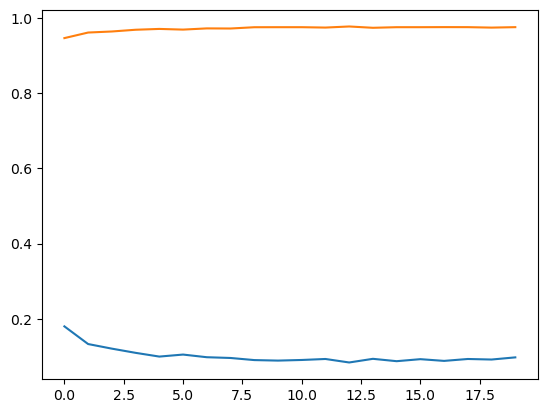

In [12]:
# Gráfico para visualizar os erros e accuracy
historico.history.keys()
#evolução do erro, azul
plt.plot(historico.history['val_loss'])
#performance da rede
plt.plot(historico.history['val_accuracy'])

In [13]:
# Obtenção das previsões 
previsoes = modelo.predict(X_teste)
previsoes

313/313 [==============================] - 1s 1ms/step


array([[2.7596870e-13, 9.7344525e-08, 1.7669483e-07, ..., 9.9999106e-01,
        3.6144651e-10, 6.8283753e-06],
       [1.4740773e-12, 2.9546960e-09, 9.9999964e-01, ..., 2.4178257e-09,
        3.1715377e-11, 5.4900643e-18],
       [1.3820007e-12, 9.9991846e-01, 1.2467913e-05, ..., 5.0323331e-05,
        5.2329456e-06, 4.2423233e-07],
       ...,
       [2.3925420e-15, 1.1663400e-13, 2.1531331e-11, ..., 5.6567542e-09,
        1.0926412e-12, 4.4073420e-09],
       [2.8117502e-12, 7.0404985e-15, 3.1864723e-11, ..., 1.0820420e-14,
        6.4085874e-08, 2.0408179e-10],
       [5.3451471e-12, 1.2457924e-16, 3.0126585e-12, ..., 8.9203635e-20,
        1.1136616e-10, 2.6714263e-15]], dtype=float32)

In [14]:
# valor máximo (com a probabilidade maior por serem 10 saídas) e geração da matriz de confusão
y_teste_matriz = [np.argmax(t) for t in y_teste]
y_previsoes_matriz = [np.argmax(t) for t in previsoes]
confusao = confusion_matrix(y_teste_matriz, y_previsoes_matriz)
confusao

array([[ 971,    0,    1,    1,    0,    2,    2,    2,    1,    0],
       [   0, 1125,    2,    1,    0,    2,    2,    1,    2,    0],
       [   4,    3, 1008,    1,    3,    0,    1,    7,    5,    0],
       [   0,    1,    7,  981,    1,    6,    0,    4,    4,    6],
       [   0,    1,    4,    1,  961,    0,    5,    1,    2,    7],
       [   3,    0,    0,   12,    1,  861,    8,    1,    5,    1],
       [   5,    3,    0,    0,    4,    6,  935,    0,    5,    0],
       [   1,    4,    8,    2,    6,    0,    0, 1002,    0,    5],
       [   7,    2,    4,    2,    4,    4,    0,    5,  943,    3],
       [   5,    3,    0,    3,   24,    2,    0,    8,    1,  963]],
      dtype=int64)

In [15]:
# Previsão com um novo registro, convertendo o array para o formato de matriz
#número 4
y_treinamento[20]

array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0.], dtype=float32)

In [16]:
#passo a mesma posição para o modelo prever
novo = X_treinamento[20]
#de matriz para vetor
novo = np.expand_dims(novo, axis = 0)
#previsao
pred = modelo.predict(novo)
#maior valor
pred = [np.argmax(pred) for t in pred]
pred

1/1 [==============================] - 0s 47ms/step


[4]